In [1]:
#import necessary packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc, plot_roc_curve, accuracy_score
from sklearn.metrics import log_loss,f1_score, matthews_corrcoef, classification_report, plot_precision_recall_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

In [2]:
X_train = pd.read_csv('data/Training_Data_Features.csv')
X_train = X_train.drop(['nameOrig', 'nameDest'], axis = 1)
X_test = pd.read_csv('data/Testing_Data_Features.csv')
X_test = X_test.drop(['nameOrig', 'nameDest'], axis = 1)
y_train = pd.read_csv('data/Training_Data_Labels.csv')
y_test = pd.read_csv('data/Testing_Data_Labels.csv')

In [3]:
X_train.head()

,step,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_CASH_OUT,type_TRANSFER
0,131,0.178902,-0.106389,0.923703,1,0,1,0
1,160,-0.049527,-0.106389,0.224101,1,0,1,0
2,307,-0.143771,-0.106389,-0.269969,1,1,1,0
3,22,-0.342151,-0.106389,-0.227073,1,1,1,0
4,209,-0.267970,1.752077,-0.369782,0,1,1,0


__Logistic Regression Model__

In [4]:
#y_train
#y_test.loc[y_test['isFraud'] == 1]

In [5]:
lr = LogisticRegression()

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.9978511002583251


In [6]:
y_pred = lr_model.predict(X_test)


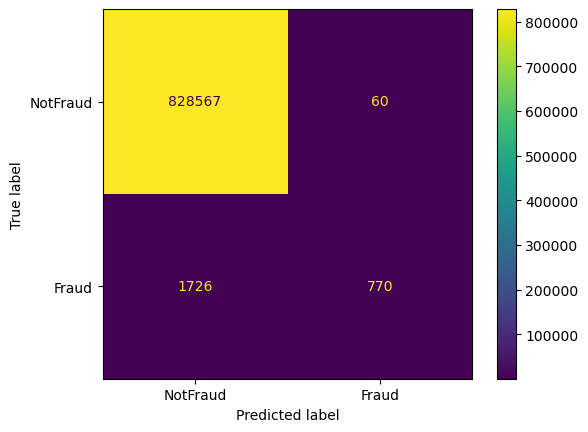

In [7]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot()

In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.93      0.31      0.46      2496

    accuracy                           1.00    831123
   macro avg       0.96      0.65      0.73    831123
weighted avg       1.00      1.00      1.00    831123



In [9]:
lr = LogisticRegression(class_weight="balanced")

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.93774808301539


In [10]:
y_pred = lr.predict(X_test)

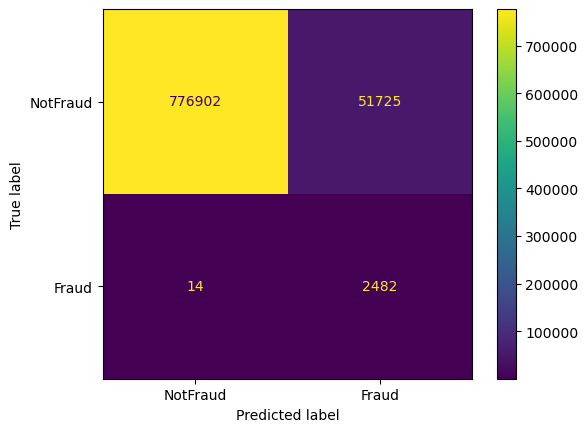

In [11]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot()

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    828627
           1       0.05      0.99      0.09      2496

    accuracy                           0.94    831123
   macro avg       0.52      0.97      0.53    831123
weighted avg       1.00      0.94      0.97    831123



we explore a resampling technique here using SMOTE. In our particular scenario, we oversample the minority class by synthetically generating additional samples.


In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)

In [14]:

y_pred_sm = clf.predict(X_test)

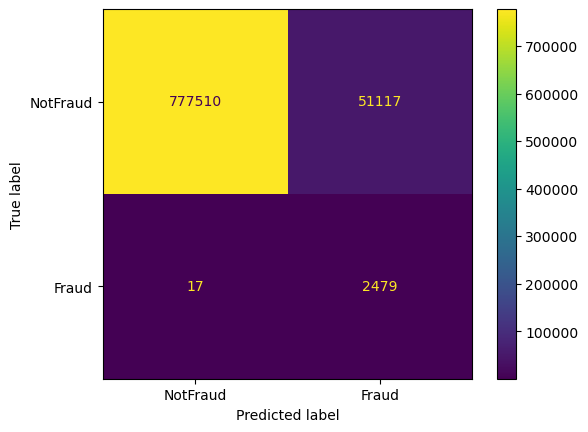

In [15]:
cm = confusion_matrix(y_test,y_pred_sm)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot()

In [16]:
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    828627
           1       0.05      0.99      0.09      2496

    accuracy                           0.94    831123
   macro avg       0.52      0.97      0.53    831123
weighted avg       1.00      0.94      0.97    831123



Random forest

In [17]:
rf_mod = RandomForestClassifier(random_state=42,n_jobs=-1)


In [18]:
rf_mod.fit(X_train,y_train)
y_pred_rf = rf_mod.predict(X_test)

In [19]:
rf_mod.score(X_train,y_train)


1.0

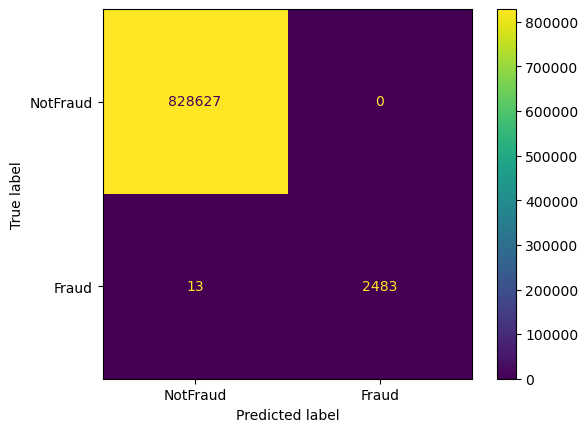

In [20]:
cm = confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(cm,display_labels = ['NotFraud', 'Fraud'])
disp.plot()

In [21]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       1.00      0.99      1.00      2496

    accuracy                           1.00    831123
   macro avg       1.00      1.00      1.00    831123
weighted avg       1.00      1.00      1.00    831123

